#건강검진 데이터를 활용한 분류 모형 만들기
-건강검진 데이터를 가지고 환자 유형 분류 하기

-종속변수 : 성별코드

-독립변수: 신장(5CM단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피  

In [1]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용 (!pip install mglearn 명령어로 설치)
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import mglearn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [9]:
import pandas as pd

# csv 데이터 가져오기
health = pd.read_csv("/content/drive/My Drive/start/health_data.csv")



display(health.head(10)) # 처음 10행 확인
print(health.info()) 

,음주여부,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5CM단위),체중(5Kg 단위),허리둘레,시력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,No,2020,1,36,M,9,165,60,72.1,1.2,...,1.0,1.1,21.0,27.0,21.0,No,0,NaN,NaN,2021-12-29
1,No,2020,2,27,F,13,150,65,81.0,0.8,...,1.0,0.5,18.0,15.0,15.0,No,0,NaN,NaN,2021-12-29
2,No,2020,3,11,F,12,155,55,70.0,0.6,...,1.0,0.7,27.0,25.0,7.0,No,0,NaN,NaN,2021-12-29
3,No,2020,4,31,M,13,160,70,90.8,1.0,...,1.0,1.2,65.0,97.0,72.0,No,1,0.0,0.0,2021-12-29
4,No,2020,5,41,F,12,155,50,75.2,1.5,...,1.0,0.7,18.0,17.0,14.0,No,0,NaN,NaN,2021-12-29
5,Yes,2020,6,27,M,9,185,85,94.0,1.2,...,1.0,1.1,25.0,32.0,26.0,Yes,0,NaN,NaN,2021-12-29
6,Yes,2020,7,44,M,9,165,80,93.0,0.8,...,1.0,0.7,18.0,20.0,35.0,Yes,1,0.0,1.0,2021-12-29
7,No,2020,8,41,M,13,160,65,92.0,0.5,...,1.0,1.2,18.0,17.0,19.0,Yes,1,0.0,2.0,2021-12-29
8,No,2020,9,41,F,17,150,50,82.0,0.4,...,1.0,0.7,42.0,48.0,39.0,No,0,NaN,NaN,2021-12-29
9,No,2020,10,48,F,14,150,45,71.2,0.8,...,1.0,0.6,22.0,11.0,10.0,No,0,NaN,NaN,2021-12-29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   음주여부         9999 non-null   object 
 1   기준년도         10000 non-null  int64  
 2   가입자일련번호      10000 non-null  int64  
 3   시도코드         10000 non-null  int64  
 4   성별코드         10000 non-null  object 
 5   연령대코드(5세단위)  10000 non-null  int64  
 6   신장(5CM단위)    10000 non-null  int64  
 7   체중(5Kg 단위)   10000 non-null  int64  
 8   허리둘레         10000 non-null  float64
 9   시력(좌)        10000 non-null  float64
 10  시력(우)        10000 non-null  float64
 11  청력(좌)        10000 non-null  int64  
 12  청력(우)        10000 non-null  int64  
 13  수축기혈압        9912 non-null   float64
 14  이완기혈압        9912 non-null   float64
 15  식전혈당(공복혈당)   9912 non-null   float64
 16  총콜레스테롤       4044 non-null   float64
 17  트리글리세라이드     4044 non-null   float64
 18  HDL콜레스테롤     4044 non-null   float64
 19  LDL콜레

In [10]:
health3 = health.drop(['기준년도','가입자일련번호','시도코드','연령대코드(5세단위)','청력(좌)','청력(우)','흡연상태','치아우식증유무','구강검진수검여부','음주여부','치석','치아우식증유무','구강검진수검여부','데이터공개일자','시력(좌)','시력(우)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤'],axis=1)
print(health3.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   성별코드        10000 non-null  object 
 1   신장(5CM단위)   10000 non-null  int64  
 2   체중(5Kg 단위)  10000 non-null  int64  
 3   허리둘레        10000 non-null  float64
 4   수축기혈압       9912 non-null   float64
 5   이완기혈압       9912 non-null   float64
 6   식전혈당(공복혈당)  9912 non-null   float64
 7   혈색소         9912 non-null   float64
 8   요단백         9861 non-null   float64
 9   혈청크레아티닌     9912 non-null   float64
 10  (혈청지오티)AST  9912 non-null   float64
 11  (혈청지오티)ALT  9912 non-null   float64
 12  감마지티피       9912 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1015.8+ KB
None


In [11]:
health3.isnull().sum() #결측치 확인

성별코드            0
신장(5CM단위)       0
체중(5Kg 단위)      0
허리둘레            0
수축기혈압          88
이완기혈압          88
식전혈당(공복혈당)     88
혈색소            88
요단백           139
혈청크레아티닌        88
(혈청지오티)AST     88
(혈청지오티)ALT     88
감마지티피          88
dtype: int64

In [12]:
health3=health3.dropna() #결측치 제거
health3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9861 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   성별코드        9861 non-null   object 
 1   신장(5CM단위)   9861 non-null   int64  
 2   체중(5Kg 단위)  9861 non-null   int64  
 3   허리둘레        9861 non-null   float64
 4   수축기혈압       9861 non-null   float64
 5   이완기혈압       9861 non-null   float64
 6   식전혈당(공복혈당)  9861 non-null   float64
 7   혈색소         9861 non-null   float64
 8   요단백         9861 non-null   float64
 9   혈청크레아티닌     9861 non-null   float64
 10  (혈청지오티)AST  9861 non-null   float64
 11  (혈청지오티)ALT  9861 non-null   float64
 12  감마지티피       9861 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1.1+ MB


#의사결정 나무 분류 모델


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health3.iloc[:, 1:]  #11개 변수 
y = health3.iloc[:, 0]   # target 변수 diagnosis 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.892


In [14]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
# 과적합(overfitting): 학습용 데이터에 대해서만 성능이 좋고 새로운 데이터에 적용했을 경우에는 성능이 좋지 않은 경우
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.927
시험용 데이터 정확도: 0.915


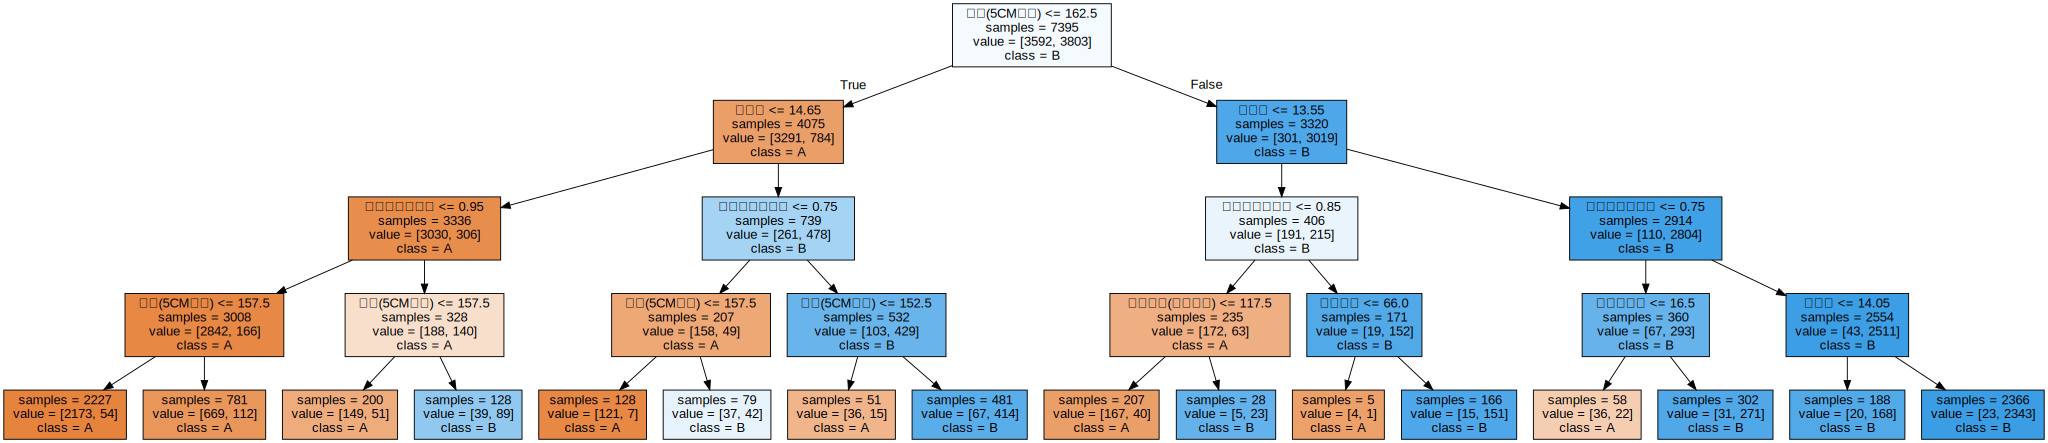

In [15]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "A", "B"],
                feature_names=health3.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

-환자유형 A와 B로 분류
-신장(5cm단위) 중요하다고 보여줌

In [16]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.70385225 0.         0.00173847 0.         0.         0.00692237
 0.18119096 0.         0.09700906 0.         0.         0.00928688]


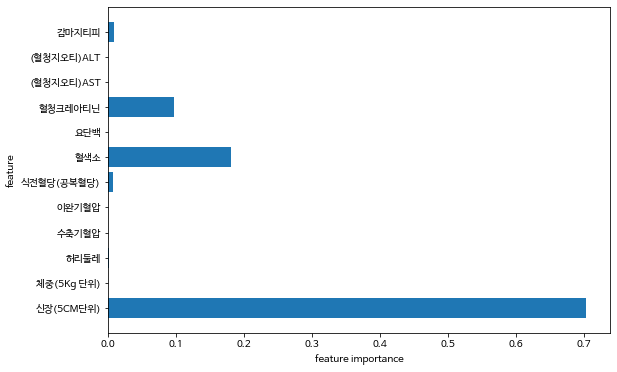

In [18]:
import numpy as np

def plot_feature_importances_health3(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health3.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health3.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_health3(tree)

In [19]:
res = pd.DataFrame(result)
res["name"] = health3.columns[1:]
display(res.info())

# 체중(5Kg 단위)의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   name    12 non-null     object 
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


None

,0,name
10,0.000000,(혈청지오티)ALT
9,0.000000,(혈청지오티)AST
11,0.009287,감마지티피
3,0.000000,수축기혈압
5,0.006922,식전혈당(공복혈당)
0,0.703852,신장(5CM단위)
7,0.000000,요단백
4,0.000000,이완기혈압
1,0.000000,체중(5Kg 단위)
2,0.001738,허리둘레


-0이랑 가까울 수록 중요도 비중이 큼

# 의사결정나무 인사이트 : 
-변수 중요도가 가장 중요한 것은 1위 신장(5cm단위),2위 혈색소, 3위 혈청크레아티닌, 4위 감마지티피, 5위 식전혈당(공복혈당)으로 중요 변수로 체택됨

의사결정 tree를 돌려본 결과
학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.892

의사결정 tree를 돌려본 결과-과적합 적용 
학습용 데이터 정확도: 0.927
시험용 데이터 정확도: 0.915

=> 과적합을 적용한 데이터가 정확도가 더 높게 나와 더 나음

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


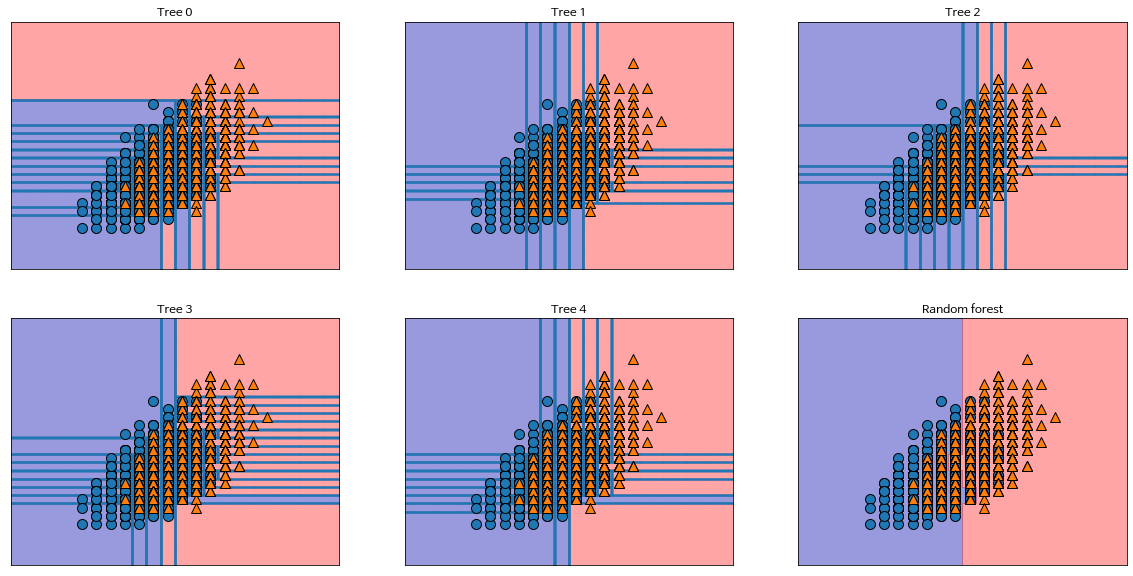

In [20]:
from sklearn.ensemble import RandomForestClassifier

 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [21]:
# 12개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.934


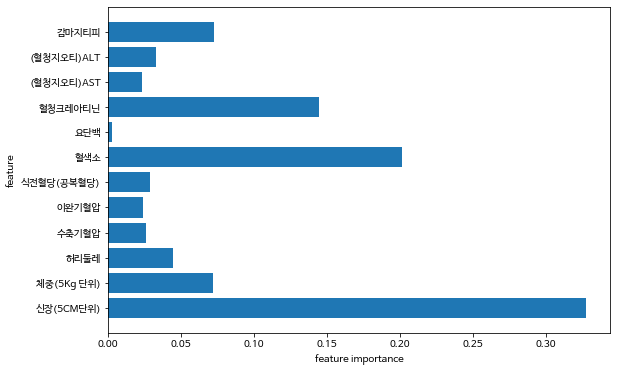

In [22]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_health3(forest)

In [23]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.87972973 0.86216216 0.88378378 0.88648649 0.87162162 0.87009472
 0.8714479  0.88903924 0.89715832 0.88362652]
Random forest:  [0.92297297 0.92972973 0.93783784 0.93513514 0.92567568 0.92422192
 0.94046008 0.94857916 0.94046008 0.932341  ]
Accuracy mean
Decision tree :0.880
Random forest :0.934


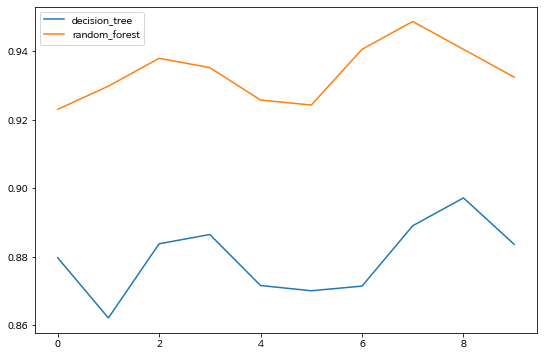

In [24]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

# 랜덤포레스트 모델 인사이트 : 
-변수 중요도가 가장 중요한 것은 1위 신장(5cm단위),2위 혈색소, 3위 혈청크레아티닌, 4위 감마지티피, 5위 식전혈당(공복혈당)으로 중요 변수로 체택됨

-랜덤포레스트 모델을 만들기 위해 랜덤 적용

변수 12개 모두 사용

y(종속변수)=성별

x(독립변수)=신장(5CM단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피  

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.934


=> 단일 의사결정 나무보다 정확도가 더 높게 나옴

#분류 모델 평가 - 교차 검증

In [25]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.87972973 0.86216216 0.88378378 0.88648649 0.87162162 0.87009472
 0.8714479  0.88903924 0.89715832 0.88362652]
Random forest:  [0.92297297 0.92972973 0.93783784 0.93513514 0.92567568 0.92422192
 0.94046008 0.94857916 0.94046008 0.932341  ]
Accuracy mean
Decision tree :0.880
Random forest :0.934


#두 분류 모델 평가 교차 검증으로 해본 결과 (인사이트)
#의사결정 나무 모델 정확도 0.88 88%, 랜덤포레스트 모델 정확도 0.934 93.4%

#=> 두 분류 모델 중 랜덤포레스트가 6%이상 정확도가 높아 채택할 것이다.

In [17]:
#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (19.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [17]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 